# **Практическая №11. Прогнозирование временных рядов, используя методы глубокого обучения**

# **Задание:**






## 1. Ознакомьтесь с библиотеками и их инструментарием
## 2. В контексте выбранного Вами набора данных, отберите несколько моделей глубокого обучения, обучите их на своих данных, после чего проведите сравнительный анализ.

## **Подготовка данных**

Используемый датасет https://zenodo.org/records/5146275


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU, Conv1D, Flatten

from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

In [5]:
filename = "metr-la.csv"
df = pd.read_csv(filename, index_col=0, parse_dates=True)
df = df.sort_index()
sensor_id = '773869'
df = df[[sensor_id]].dropna()

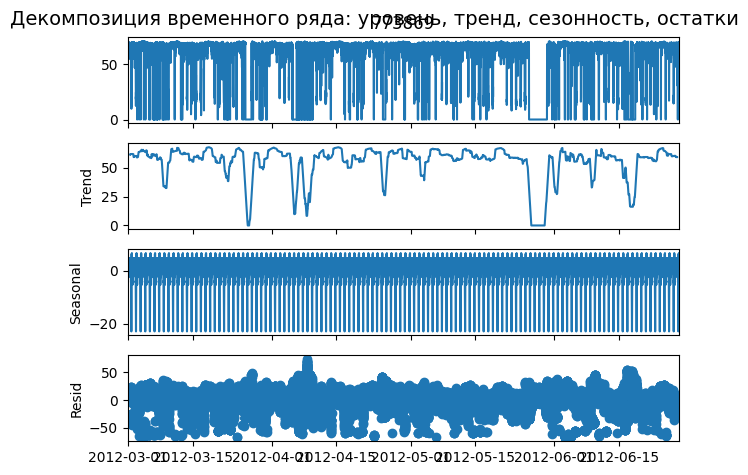

In [6]:
result = seasonal_decompose(df[sensor_id], model='additive', period=288)
result.plot()
plt.suptitle("Декомпозиция временного ряда: уровень, тренд, сезонность, остатки", fontsize=14)
plt.show()

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

look_back = 24
forecast_horizon = 1

X, Y = [], []
for i in range(len(data_scaled) - look_back - forecast_horizon):
    X.append(data_scaled[i:i + look_back])
    Y.append(data_scaled[i + look_back:i + look_back + forecast_horizon])
X, Y = np.array(X), np.array(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape, Y_train.shape)

(27397, 24, 1) (27397, 1, 1)


In [ ]:
metrics = {}

In [ ]:
# --- RNN ---
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, input_shape=(look_back, X_train.shape[2]), activation='tanh'))
model_rnn.add(Dense(X_train.shape[2]))
model_rnn.compile(loss='mean_squared_error', optimizer='adam')
history_rnn = model_rnn.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=2)
pred_rnn_train = model_rnn.predict(X_train)
pred_rnn = model_rnn.predict(X_test)
metrics['RNN'] = np.sqrt(mean_squared_error(Y_test.squeeze(), pred_rnn.squeeze()))
print("RNN RMSE:", metrics['RNN'])

Epoch 1/50
857/857 - 2s - 3ms/step - loss: 0.0142 - val_loss: 0.0100
Epoch 2/50
857/857 - 2s - 2ms/step - loss: 0.0096 - val_loss: 0.0103
Epoch 3/50
857/857 - 2s - 2ms/step - loss: 0.0096 - val_loss: 0.0101
Epoch 4/50
857/857 - 2s - 2ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 5/50
857/857 - 2s - 2ms/step - loss: 0.0094 - val_loss: 0.0095
Epoch 6/50
857/857 - 2s - 2ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 7/50
857/857 - 2s - 2ms/step - loss: 0.0094 - val_loss: 0.0101
Epoch 8/50
857/857 - 2s - 2ms/step - loss: 0.0094 - val_loss: 0.0098
Epoch 9/50
857/857 - 2s - 2ms/step - loss: 0.0095 - val_loss: 0.0098
Epoch 10/50
857/857 - 2s - 2ms/step - loss: 0.0094 - val_loss: 0.0101
Epoch 11/50
857/857 - 2s - 2ms/step - loss: 0.0094 - val_loss: 0.0097
Epoch 12/50
857/857 - 2s - 2ms/step - loss: 0.0094 - val_loss: 0.0097
Epoch 13/50
857/857 - 2s - 2ms/step - loss: 0.0094 - val_loss: 0.0096
Epoch 14/50
857/857 - 2s - 2ms/step - loss: 0.0094 - val_loss: 0.0096
Epoch 15/50
857/857 - 2s - 2m

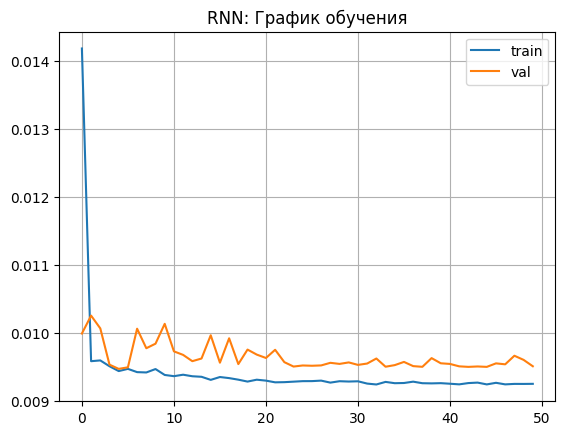

In [18]:
# RNN - График обучения
plt.plot(history_rnn.history['loss'], label='train')
plt.plot(history_rnn.history['val_loss'], label='val')
plt.title("RNN: График обучения")
plt.legend()
plt.grid(True)
plt.show()

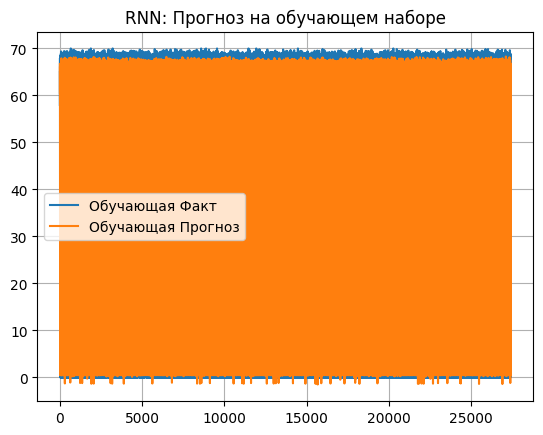

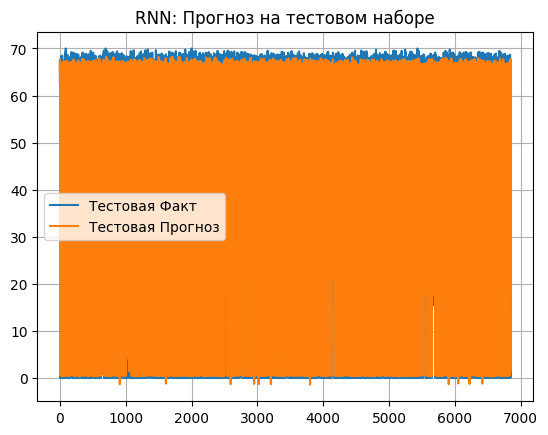

In [21]:
# RNN - Прогнозы
plt.plot(scaler.inverse_transform(Y_train.squeeze().reshape(-1, 1)), label='Train Actual'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.plot(scaler.inverse_transform(pred_rnn_train.squeeze().reshape(-1, 1)), label='Train Predict'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.title("RNN: Прогноз на обучающем наборе".replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.legend()
plt.grid(True)
plt.show()

plt.plot(scaler.inverse_transform(Y_test.squeeze().reshape(-1, 1)), label='Test Actual'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.plot(scaler.inverse_transform(pred_rnn.squeeze().reshape(-1, 1)), label='Test Predict'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.title("RNN: Прогноз на тестовом наборе".replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# --- LSTM ---
model_lstm = Sequential()
model_lstm.add(LSTM(100, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(X_train.shape[2]))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
history_lstm = model_lstm.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=2)
pred_lstm_train = model_lstm.predict(X_train)
pred_lstm = model_lstm.predict(X_test)
metrics['LSTM'] = np.sqrt(mean_squared_error(Y_test.squeeze(), pred_lstm.squeeze()))
print("LSTM RMSE:", metrics['LSTM'])

Epoch 1/50
857/857 - 12s - 14ms/step - loss: 0.0202 - val_loss: 0.0112
Epoch 2/50
857/857 - 10s - 12ms/step - loss: 0.0109 - val_loss: 0.0105
Epoch 3/50
857/857 - 10s - 12ms/step - loss: 0.0102 - val_loss: 0.0097
Epoch 4/50
857/857 - 10s - 12ms/step - loss: 0.0098 - val_loss: 0.0097
Epoch 5/50
857/857 - 10s - 12ms/step - loss: 0.0098 - val_loss: 0.0097
Epoch 6/50
857/857 - 10s - 11ms/step - loss: 0.0097 - val_loss: 0.0094
Epoch 7/50
857/857 - 10s - 11ms/step - loss: 0.0096 - val_loss: 0.0098
Epoch 8/50
857/857 - 10s - 11ms/step - loss: 0.0094 - val_loss: 0.0094
Epoch 9/50
857/857 - 10s - 12ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 10/50
857/857 - 9s - 11ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 11/50
857/857 - 9s - 11ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 12/50
857/857 - 9s - 11ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 13/50
857/857 - 9s - 11ms/step - loss: 0.0091 - val_loss: 0.0093
Epoch 14/50
857/857 - 9s - 11ms/step - loss: 0.0091 - val_loss: 0.0093
Epoch 

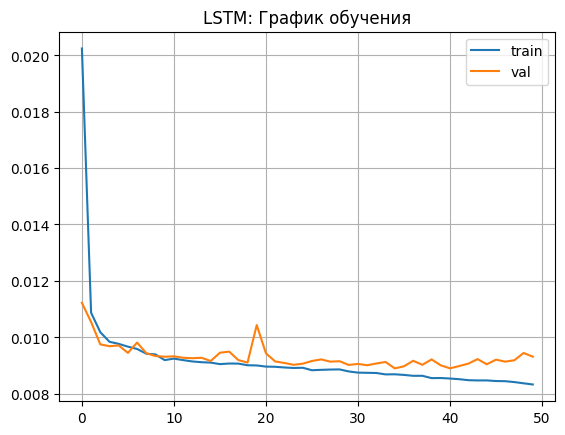

In [23]:
plt.plot(history_lstm.history['loss'], label='train'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.plot(history_lstm.history['val_loss'], label='val'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.title("LSTM: График обучения".replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.legend()
plt.grid(True)
plt.show()

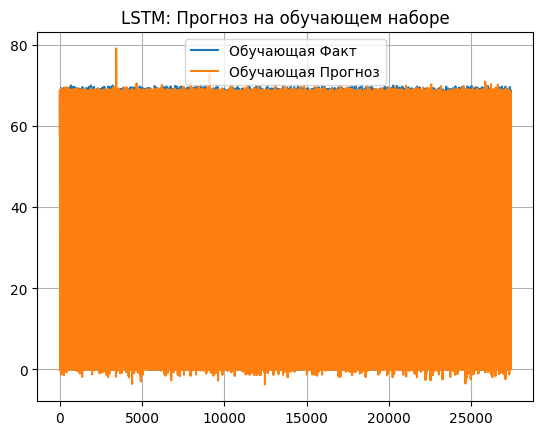

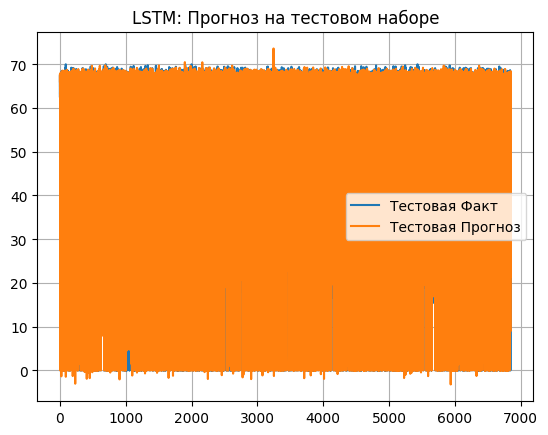

In [24]:
plt.plot(scaler.inverse_transform(Y_train.squeeze().reshape(-1, 1)), label='Train Actual'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.plot(scaler.inverse_transform(pred_lstm_train.squeeze().reshape(-1, 1)), label='Train Predict'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.title("LSTM: Прогноз на обучающем наборе".replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.legend()
plt.grid(True)
plt.show()

plt.plot(scaler.inverse_transform(Y_test.squeeze().reshape(-1, 1)), label='Test Actual'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.plot(scaler.inverse_transform(pred_lstm.squeeze().reshape(-1, 1)), label='Test Predict'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.title("LSTM: Прогноз на тестовом наборе".replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# --- GRU ---
model_gru = Sequential()
model_gru.add(GRU(100, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(50, return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(25))
model_gru.add(Dense(X_train.shape[2]))
model_gru.compile(loss='mean_squared_error', optimizer='adam')
history_gru = model_gru.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=2)
pred_gru_train = model_gru.predict(X_train)
pred_gru = model_gru.predict(X_test)
metrics['GRU'] = np.sqrt(mean_squared_error(Y_test.squeeze(), pred_gru.squeeze()))
print("GRU RMSE:", metrics['GRU'])

Epoch 1/50
857/857 - 15s - 17ms/step - loss: 0.0177 - val_loss: 0.0102
Epoch 2/50
857/857 - 11s - 13ms/step - loss: 0.0106 - val_loss: 0.0099
Epoch 3/50
857/857 - 12s - 13ms/step - loss: 0.0102 - val_loss: 0.0106
Epoch 4/50
857/857 - 12s - 14ms/step - loss: 0.0101 - val_loss: 0.0098
Epoch 5/50
857/857 - 12s - 14ms/step - loss: 0.0100 - val_loss: 0.0095
Epoch 6/50
857/857 - 12s - 14ms/step - loss: 0.0097 - val_loss: 0.0103
Epoch 7/50
857/857 - 12s - 14ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 8/50
857/857 - 12s - 14ms/step - loss: 0.0097 - val_loss: 0.0099
Epoch 9/50
857/857 - 12s - 14ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 10/50
857/857 - 12s - 14ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 11/50
857/857 - 12s - 14ms/step - loss: 0.0095 - val_loss: 0.0097
Epoch 12/50
857/857 - 12s - 14ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 13/50
857/857 - 12s - 14ms/step - loss: 0.0093 - val_loss: 0.0094
Epoch 14/50
857/857 - 12s - 14ms/step - loss: 0.0093 - val_loss: 0.0095
E

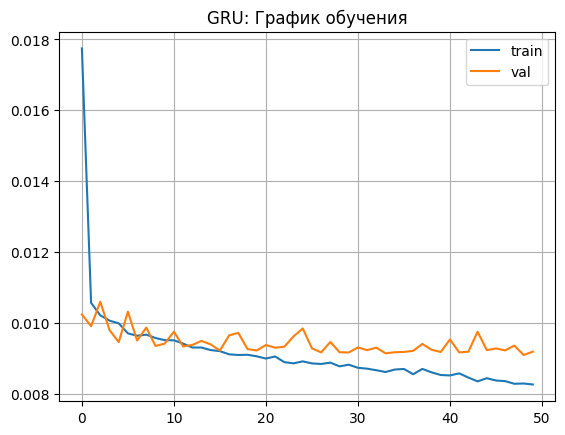

In [26]:
plt.plot(history_gru.history['loss'], label='train'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.plot(history_gru.history['val_loss'], label='val'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.title("GRU: График обучения".replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.legend()
plt.grid(True)
plt.show()

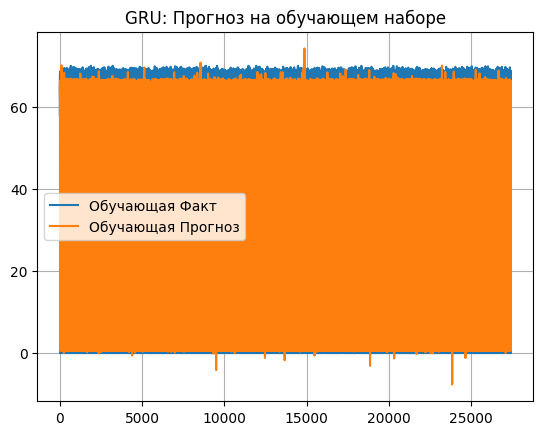

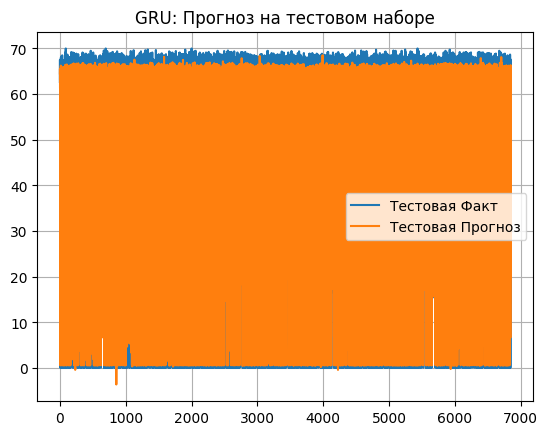

In [27]:
plt.plot(scaler.inverse_transform(Y_train.squeeze().reshape(-1, 1)), label='Train Actual'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.plot(scaler.inverse_transform(pred_gru_train.squeeze().reshape(-1, 1)), label='Train Predict'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.title("GRU: Прогноз на обучающем наборе".replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.legend()
plt.grid(True)
plt.show()

plt.plot(scaler.inverse_transform(Y_test.squeeze().reshape(-1, 1)), label='Test Actual'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.plot(scaler.inverse_transform(pred_gru.squeeze().reshape(-1, 1)), label='Test Predict'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.title("GRU: Прогноз на тестовом наборе".replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# --- N-BEATS ---
model_nbeats = Sequential()
model_nbeats.add(Flatten(input_shape=(look_back, X_train.shape[2])))
model_nbeats.add(Dense(128, activation='relu'))
model_nbeats.add(Dense(128, activation='relu'))
model_nbeats.add(Dense(X_train.shape[2]))
model_nbeats.compile(loss='mean_squared_error', optimizer='adam')
history_nbeats = model_nbeats.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=2)
pred_nbeats_train = model_nbeats.predict(X_train)
pred_nbeats = model_nbeats.predict(X_test)
metrics['N-BEATS'] = np.sqrt(mean_squared_error(Y_test.squeeze(), pred_nbeats.squeeze()))
print("N-BEATS RMSE:", metrics['N-BEATS'])

Epoch 1/50
857/857 - 1s - 2ms/step - loss: 0.0132 - val_loss: 0.0124
Epoch 2/50
857/857 - 1s - 863us/step - loss: 0.0099 - val_loss: 0.0098
Epoch 3/50
857/857 - 1s - 900us/step - loss: 0.0098 - val_loss: 0.0097
Epoch 4/50
857/857 - 1s - 885us/step - loss: 0.0095 - val_loss: 0.0096
Epoch 5/50
857/857 - 1s - 891us/step - loss: 0.0095 - val_loss: 0.0099
Epoch 6/50
857/857 - 1s - 874us/step - loss: 0.0094 - val_loss: 0.0105
Epoch 7/50
857/857 - 1s - 881us/step - loss: 0.0093 - val_loss: 0.0095
Epoch 8/50
857/857 - 1s - 879us/step - loss: 0.0092 - val_loss: 0.0094
Epoch 9/50
857/857 - 1s - 867us/step - loss: 0.0091 - val_loss: 0.0096
Epoch 10/50
857/857 - 1s - 872us/step - loss: 0.0091 - val_loss: 0.0095
Epoch 11/50
857/857 - 1s - 884us/step - loss: 0.0091 - val_loss: 0.0094
Epoch 12/50
857/857 - 1s - 867us/step - loss: 0.0089 - val_loss: 0.0100
Epoch 13/50
857/857 - 1s - 865us/step - loss: 0.0090 - val_loss: 0.0097
Epoch 14/50
857/857 - 1s - 853us/step - loss: 0.0089 - val_loss: 0.0095
Epo

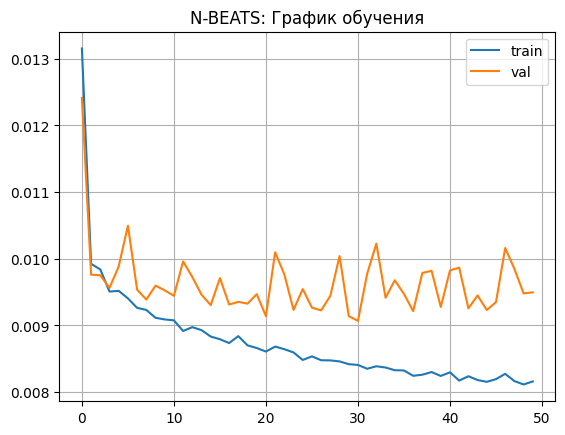

In [29]:
plt.plot(history_nbeats.history['loss'], label='train'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.plot(history_nbeats.history['val_loss'], label='val'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.title("N-BEATS: График обучения".replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.legend()
plt.grid(True)
plt.show()

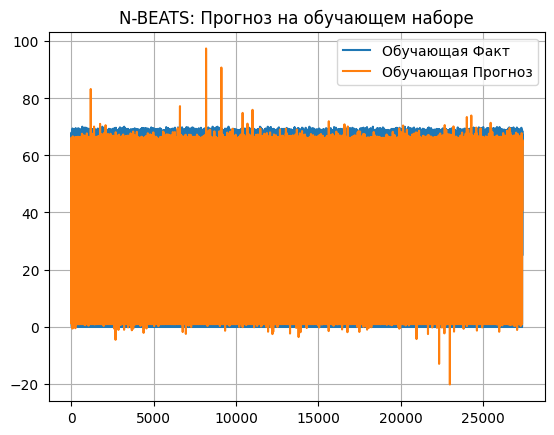

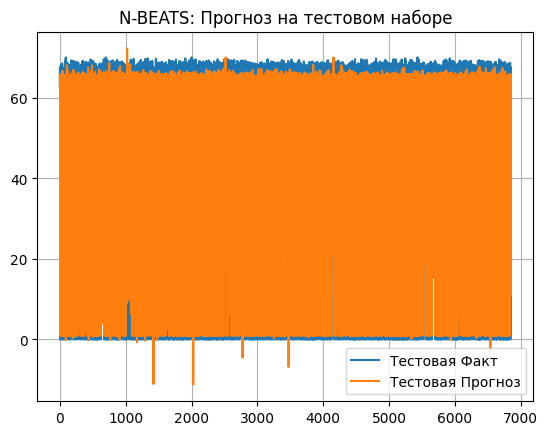

In [30]:
plt.plot(scaler.inverse_transform(Y_train.squeeze().reshape(-1, 1)), label='Train Actual'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.plot(scaler.inverse_transform(pred_nbeats_train.squeeze().reshape(-1, 1)), label='Train Predict'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.title("N-BEATS: Прогноз на обучающем наборе".replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.legend()
plt.grid(True)
plt.show()

plt.plot(scaler.inverse_transform(Y_test.squeeze().reshape(-1, 1)), label='Test Actual'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.plot(scaler.inverse_transform(pred_nbeats.squeeze().reshape(-1, 1)), label='Test Predict'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.title("N-BEATS: Прогноз на тестовом наборе".replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# --- TCN ---
model_tcn = Sequential()
model_tcn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(look_back, X_train.shape[2])))
model_tcn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_tcn.add(Flatten())
model_tcn.add(Dense(50, activation='relu'))
model_tcn.add(Dense(X_train.shape[2]))
model_tcn.compile(loss='mean_squared_error', optimizer='adam')
history_tcn = model_tcn.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=2)
pred_tcn_train = model_tcn.predict(X_train)
pred_tcn = model_tcn.predict(X_test)
metrics['TCN'] = np.sqrt(mean_squared_error(Y_test.squeeze(), pred_tcn.squeeze()))
print("TCN RMSE:", metrics['TCN'])

Epoch 1/50
857/857 - 2s - 3ms/step - loss: 0.0156 - val_loss: 0.0096
Epoch 2/50
857/857 - 1s - 2ms/step - loss: 0.0096 - val_loss: 0.0097
Epoch 3/50
857/857 - 1s - 2ms/step - loss: 0.0097 - val_loss: 0.0103
Epoch 4/50
857/857 - 1s - 2ms/step - loss: 0.0094 - val_loss: 0.0094
Epoch 5/50
857/857 - 1s - 2ms/step - loss: 0.0093 - val_loss: 0.0104
Epoch 6/50
857/857 - 1s - 2ms/step - loss: 0.0092 - val_loss: 0.0108
Epoch 7/50
857/857 - 1s - 2ms/step - loss: 0.0092 - val_loss: 0.0098
Epoch 8/50
857/857 - 1s - 2ms/step - loss: 0.0091 - val_loss: 0.0097
Epoch 9/50
857/857 - 1s - 2ms/step - loss: 0.0091 - val_loss: 0.0095
Epoch 10/50
857/857 - 1s - 2ms/step - loss: 0.0089 - val_loss: 0.0101
Epoch 11/50
857/857 - 1s - 2ms/step - loss: 0.0090 - val_loss: 0.0100
Epoch 12/50
857/857 - 1s - 2ms/step - loss: 0.0089 - val_loss: 0.0097
Epoch 13/50
857/857 - 1s - 2ms/step - loss: 0.0088 - val_loss: 0.0102
Epoch 14/50
857/857 - 1s - 2ms/step - loss: 0.0088 - val_loss: 0.0098
Epoch 15/50
857/857 - 1s - 2m

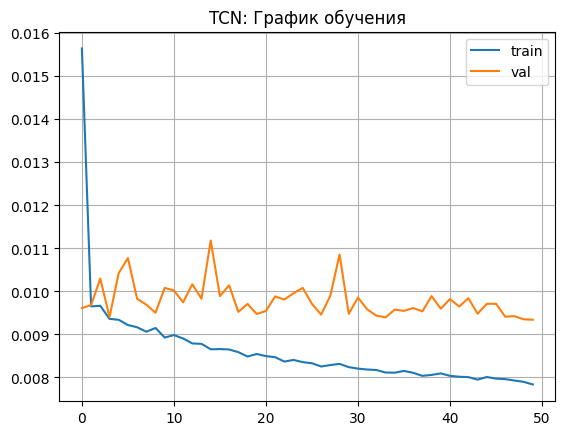

In [32]:
plt.plot(history_tcn.history['loss'], label='train'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.plot(history_tcn.history['val_loss'], label='val'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.title("TCN: График обучения".replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.legend()
plt.grid(True)
plt.show()

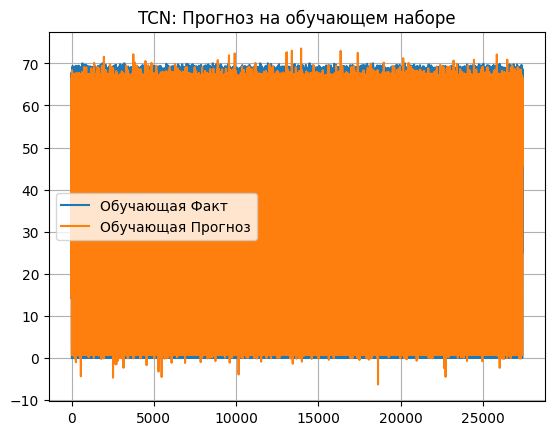

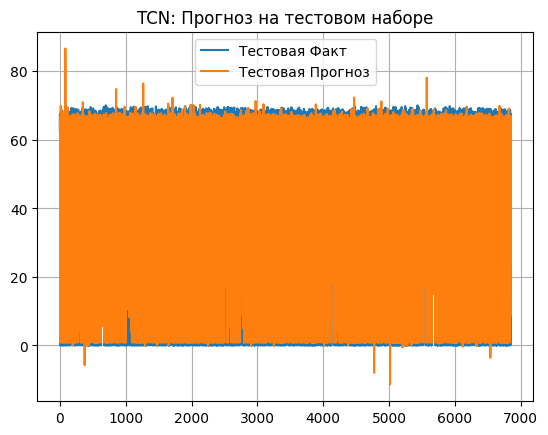

In [33]:
plt.plot(scaler.inverse_transform(Y_train.squeeze().reshape(-1, 1)), label='Train Actual'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.plot(scaler.inverse_transform(pred_tcn_train.squeeze().reshape(-1, 1)), label='Train Predict'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.title("TCN: Прогноз на обучающем наборе".replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.legend()
plt.grid(True)
plt.show()

plt.plot(scaler.inverse_transform(Y_test.squeeze().reshape(-1, 1)), label='Test Actual'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.plot(scaler.inverse_transform(pred_tcn.squeeze().reshape(-1, 1)), label='Test Predict'.replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.title("TCN: Прогноз на тестовом наборе".replace('Train', 'Обучающая').replace('Test', 'Тестовая').replace('Actual', 'Факт').replace('Predict', 'Прогноз'))
plt.legend()
plt.grid(True)
plt.show()


Сравнительная таблица RMSE:
             RMSE
RNN      0.097503
LSTM     0.096474
GRU      0.095828
N-BEATS  0.097434
TCN      0.096641


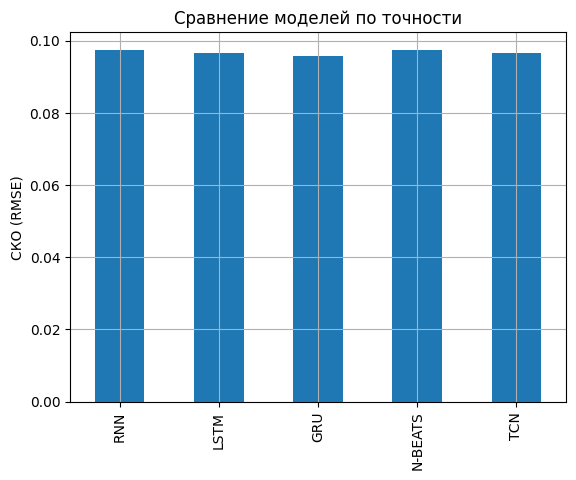

In [ ]:
# --- Сравнение моделей ---
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['RMSE'])
print("\nСравнительная таблица RMSE:")
print(metrics_df)

metrics_df.plot(kind='bar', legend=False)
plt.ylabel('СКО (RMSE)')
plt.title('Сравнение моделей по точности')
plt.grid(True)
plt.show()

In [40]:
def predict_all_models(models_dict, df, timestamp_str):
    """
    Сделать прогноз по всем моделям для заданного времени.
    """
    timestamp = pd.to_datetime(timestamp_str)
    index = df.index.get_loc(timestamp)

    if index < look_back:
        raise ValueError("Недостаточно данных перед этим временем")

    last_sequence = df.iloc[index - look_back:index].values
    last_sequence_scaled = scaler.transform(last_sequence).reshape(1, look_back, -1)

    real_value = df.iloc[index].values[0] if index < len(df) else None

    results = []
    for name, model in models_dict.items():
        pred_scaled = model.predict(last_sequence_scaled)
        pred = scaler.inverse_transform(pred_scaled)[0][0]
        error = abs(pred - real_value) if real_value is not None else None
        results.append((name, round(pred, 2), round(real_value, 2) if real_value else None, round(error, 2) if error else None))

    results_df = pd.DataFrame(results, columns=["Модель", "Прогноз", "Факт", "Ошибка"])
    print(f"\n📅 Время: {timestamp_str}\n")

    return results_df


In [41]:
models_dict = {
    'RNN': model_rnn,
    'LSTM': model_lstm,
    'GRU': model_gru,
    'N-BEATS': model_nbeats,
    'TCN': model_tcn,
}

In [54]:
predict_all_models(models_dict, df, "2012-03-05 16:30:00")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

📅 Время: 2012-03-05 16:30:00



,Модель,Прогноз,Факт,Ошибка
0,RNN,65.029999,63.88,1.16
1,LSTM,64.919998,63.88,1.05
2,GRU,62.990002,63.88,0.89
3,N-BEATS,61.820000,63.88,2.05
4,TCN,61.549999,63.88,2.32


### 🔚 Вывод

В ходе практической работы были реализованы и протестированы пять моделей глубокого обучения для задачи краткосрочного прогнозирования временного ряда дорожной нагрузки (скорости движения) на основе датасета **METR-LA**. Все модели обучались на одном и том же наборе данных и сравнивались по метрике **RMSE** (среднеквадратичное отклонение ошибки прогноза).

#### 📊 Сравнительные результаты:

| Модель    | RMSE     |
|-----------|----------|
| RNN       | 0.097503 |
| LSTM      | 0.096474 |
| GRU       | 0.095828 |
| N-BEATS   | 0.097434 |
| TCN       | 0.096641 |

Наилучший результат показала модель **GRU** с RMSE = **0.0958**, продемонстрировав более высокую точность по сравнению с другими подходами. Модель **LSTM** заняла второе место (0.0965), а **TCN** — третье (0.0966). Простейшая модель **RNN** показала наименьшую точность, что ожидаемо из-за ограниченной способности к запоминанию длинных зависимостей. Современная модель **N-BEATS** оказалась лишь немного лучше RNN, что может быть связано с особенностями архитектуры и размером обучающей выборки.

Таким образом, модели на основе **GRU** и **LSTM** оказались наиболее эффективными в контексте данной задачи. Это подтверждает их пригодность для задач временного прогнозирования в условиях городского трафика.
